# Trabalho Final de Curso de Machine Learning Aplicado II

Prof.Dr. Juan Gabriel

Equipe: Alexandra Amaro, Edney Silva e Maria Juliana


### Modelos de predição de Popularidade de músicas das bases de dados Spotify (Kaggle): https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset/data - dataset.csv

### Conexão com Google.Colab *Drive*

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importação dos Dados

In [105]:
import pandas as pd

df = pd.read_csv(r'/content/drive/MyDrive/dataset.csv')

### Análise Exploratória dos Dados

In [3]:
# Tipos dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [4]:
# Visualizado prévia dos dados
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [5]:
# Análise estatística dos dados
df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


### Análise de valores e Limpeza de atributos que não contribuem para o treinamento do modelo

In [106]:
colunas_para_analisar = ['Unnamed: 0', 'track_id', 'explicit']

for coluna in colunas_para_analisar:
    # Verifica se a coluna existe no dataset para evitar erros
    if coluna in df.columns:
        print(f"---------------------- Atributo: {coluna} ----------------------")
        print(f"Quantidade de Valores únicos: {df[coluna].nunique()}")
        print(f"Valores no Detalhe:")
        print(df[coluna].unique())
        #print("-" * 55)
    else:
        print(f"Atenção: A coluna '{coluna}' não foi encontrada no DataFrame.")

---------------------- Atributo: Unnamed: 0 ----------------------
Quantidade de Valores únicos: 114000
Valores no Detalhe:
[     0      1      2 ... 113997 113998 113999]
---------------------- Atributo: track_id ----------------------
Quantidade de Valores únicos: 89741
Valores no Detalhe:
['5SuOikwiRyPMVoIQDJUgSV' '4qPNDBW1i3p13qLCt0Ki3A'
 '1iJBSr7s7jYXzM8EGcbK5b' ... '6x8ZfSoqDjuNa5SVP5QjvX'
 '2e6sXL2bYv4bSz6VTdnfLs' '2hETkH7cOfqmz3LqZDHZf5']
---------------------- Atributo: explicit ----------------------
Quantidade de Valores únicos: 2
Valores no Detalhe:
[False  True]


#### Analisando os dados dos atributos concluímos que não contribuem para o treinamento do modelo, por isso decidimos apagar esses atributos na próxima celula a seguir, para ganho de performance de processamento

In [107]:
df.drop(columns=colunas_para_analisar, inplace=True)

#### Verificando quantos Artistas, Albuns, Músicas e Gêneros são únicos na base de dados

In [108]:

print(f"Artistas Únicos: {df['artists'].nunique()}")
print(f"Gêneros Únicos: {df['track_genre'].nunique()}")
print(f"Albuns Únicos: {df['album_name'].nunique()}")
print(f"Músicas Únicos: {df['track_name'].nunique()}")


Artistas Únicos: 31437
Gêneros Únicos: 114
Albuns Únicos: 46589
Músicas Únicos: 73608


#### Verificando dados nulos ou faltantes

In [109]:
df.isnull().sum()

,0
artists,1
album_name,1
track_name,1
popularity,0
duration_ms,0
danceability,0
energy,0
key,0
loudness,0
mode,0


In [110]:
# Definição de vetor com as Colunas com dados faltantes idenficados
colunas_com_nulos = ['artists', 'album_name', 'track_name']

# Remoção das linhas com valores faltantes em qualquer uma dessas três colunas
df.dropna(subset=colunas_com_nulos, inplace=True)

# Verificação da remoção das linhas com dados faltantes
print(df.isnull().sum())

artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


In [111]:
df = df.drop(columns = ['track_name', 'album_name', 'artists'])

In [113]:
# Comando para contar quantas músicas têm Loudness positivo
print(f'Quantidade de Loudness Positivos: ', df[df['loudness'] > 0].shape[0])
print(f'Quantidade de Loudness Menor que 2: ', df[df['time_signature'] < 2].shape[0])

# visualização dos valores em análise
#print(df[df['loudness'] > 0]['loudness'])
#print(df[df['time_signature'] < 2]['time_signature'])

# Corrigindo os valores para negativos
df.loc[df['loudness'] > 0, 'loudness'] = df['loudness'] * -1
# Corrigindo os valores menor que 2
df.loc[df['time_signature'] < 2 , 'time_signature'] = df['time_signature'] + 2

Quantidade de Loudness Positivos:  0
Quantidade de Loudness Menor que 2:  0


### Naive Bayes

In [114]:
df['popularity'] = pd.cut(df['popularity'],
                         bins = [0, 30, 60, 100],
                         labels = ['baixa', 'media', 'alta'])

In [115]:
df['popularity']

,popularity
0,alta
1,media
2,media
3,alta
4,alta
...,...
113995,baixa
113996,baixa
113997,baixa
113998,media


In [116]:
df['popularity'].unique()

['alta', 'media', NaN, 'baixa']
Categories (3, object): ['baixa' < 'media' < 'alta']

In [117]:
df.isnull().sum()

,0
popularity,16019
duration_ms,0
danceability,0
energy,0
key,0
loudness,0
mode,0
speechiness,0
acousticness,0
instrumentalness,0


In [118]:
df = df.dropna()

In [119]:
df.isnull().sum()

,0
popularity,0
duration_ms,0
danceability,0
energy,0
key,0
loudness,0
mode,0
speechiness,0
acousticness,0
instrumentalness,0


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97980 entries, 0 to 113999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   popularity        97980 non-null  category
 1   duration_ms       97980 non-null  int64   
 2   danceability      97980 non-null  float64 
 3   energy            97980 non-null  float64 
 4   key               97980 non-null  int64   
 5   loudness          97980 non-null  float64 
 6   mode              97980 non-null  int64   
 7   speechiness       97980 non-null  float64 
 8   acousticness      97980 non-null  float64 
 9   instrumentalness  97980 non-null  float64 
 10  liveness          97980 non-null  float64 
 11  valence           97980 non-null  float64 
 12  tempo             97980 non-null  float64 
 13  time_signature    97980 non-null  int64   
 14  track_genre       97980 non-null  object  
dtypes: category(1), float64(9), int64(4), object(1)
memory usage: 11.3+ MB


In [121]:
X = df.drop(['popularity'], axis = 1)
y = df['popularity']

In [122]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [123]:
num_cols = X.select_dtypes(include = ['float64', 'int64']).columns
cat_cols = ['track_genre']

In [124]:
preprocess = ColumnTransformer(
    transformers = [
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown = 'ignore', sparse_output = False), cat_cols)
    ]
)

In [125]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42, stratify = y)

In [126]:
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

In [127]:
pipeline_nb = Pipeline([
    ('preprocess', preprocess),
    ('model', GaussianNB())
])

In [128]:
pipeline_nb.fit(X_train, y_train)
y_pred = pipeline_nb.predict(X_test)

In [129]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

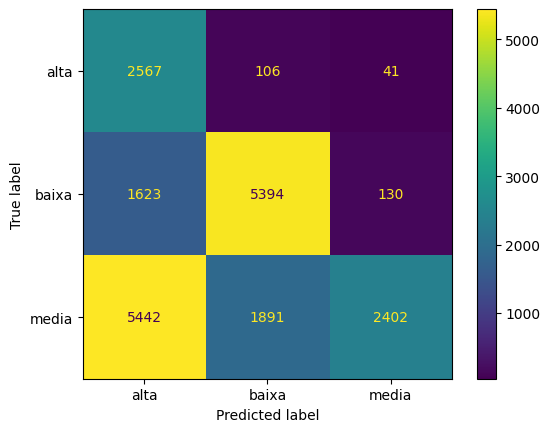


Relatório de Classificação - Naive Bayes
              precision    recall  f1-score   support

        alta       0.27      0.95      0.42      2714
       baixa       0.73      0.75      0.74      7147
       media       0.93      0.25      0.39      9735

    accuracy                           0.53     19596
   macro avg       0.64      0.65      0.52     19596
weighted avg       0.77      0.53      0.52     19596



In [130]:
cm_nb = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay.from_estimator(pipeline_nb, X_test, y_test)
plt.show()

print("\nRelatório de Classificação - Naive Bayes")
print(classification_report(y_test, y_pred))

### SVM

In [131]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

In [132]:
num_cols = X.select_dtypes(include = ['float64', 'int64']).columns
cat_cols = ['track_genre']

In [133]:
preprocess = ColumnTransformer(
    transformers = [
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown = 'ignore', sparse_output = False), cat_cols)
    ]
)

In [134]:
pipeline_svm_otimizado = Pipeline([
    ('preprocess', preprocess),
    ('model', LinearSVC(random_state=42, dual='auto', max_iter=10000))
    # 'dual='auto'' e 'max_iter=10000' ajudam na convergência e performance.
])

#### Treino e Predição

In [135]:
pipeline_svm_otimizado.fit(X_train, y_train)
y_pred_svm = pipeline_svm_otimizado.predict(X_test)

#### Avaliação do SVM (Matriz de Confusão e Relatório)

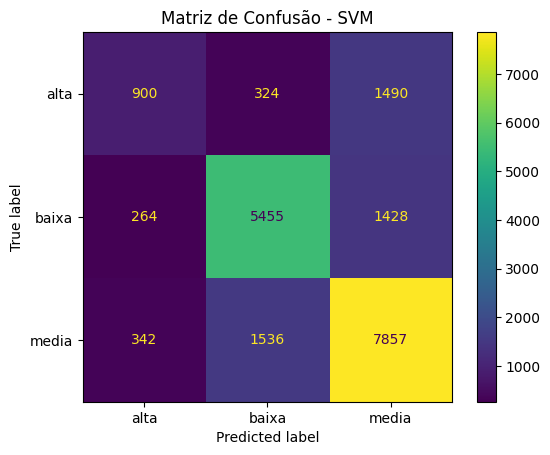


Relatório de Classificação - SVM
              precision    recall  f1-score   support

        alta       0.60      0.33      0.43      2714
       baixa       0.75      0.76      0.75      7147
       media       0.73      0.81      0.77      9735

    accuracy                           0.73     19596
   macro avg       0.69      0.63      0.65     19596
weighted avg       0.72      0.73      0.71     19596



In [136]:
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Exibição da Matriz de Confusão
ConfusionMatrixDisplay.from_estimator(pipeline_svm_otimizado, X_test, y_test)
plt.title("Matriz de Confusão - SVM")
plt.show()

print("\nRelatório de Classificação - SVM")
print(classification_report(y_test, y_pred_svm))

#### KNN

In [137]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

In [138]:
# Definindo o número de vizinhos
pipeline_knn = Pipeline([
    ('preprocess', preprocess),
    ('model', KNeighborsClassifier(
        n_neighbors=5,
        algorithm='auto',
        n_jobs=-1
    ))
])

#### Treino e Predição

In [139]:
pipeline_knn.fit(X_train, y_train)
y_pred_knn = pipeline_knn.predict(X_test)

#### Avaliação

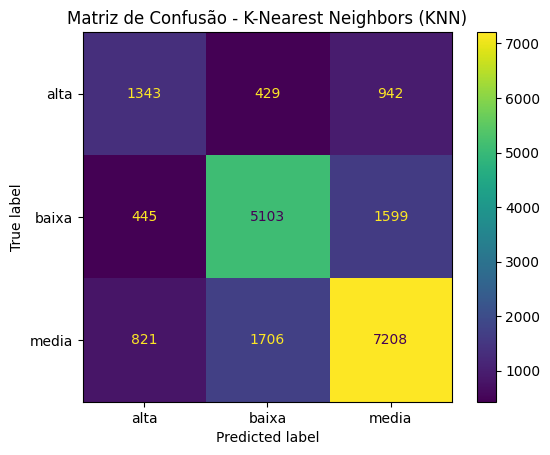


Relatório de Classificação - KNN
              precision    recall  f1-score   support

        alta       0.51      0.49      0.50      2714
       baixa       0.71      0.71      0.71      7147
       media       0.74      0.74      0.74      9735

    accuracy                           0.70     19596
   macro avg       0.65      0.65      0.65     19596
weighted avg       0.70      0.70      0.70     19596



In [140]:
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Exibição da Matriz de Confusão
ConfusionMatrixDisplay.from_estimator(pipeline_knn, X_test, y_test)
plt.title("Matriz de Confusão - K-Nearest Neighbors (KNN)")
plt.show()

print("\nRelatório de Classificação - KNN")
print(classification_report(y_test, y_pred_knn))

### Visualização Gráfica Comparativa dos dados reais vs predidos

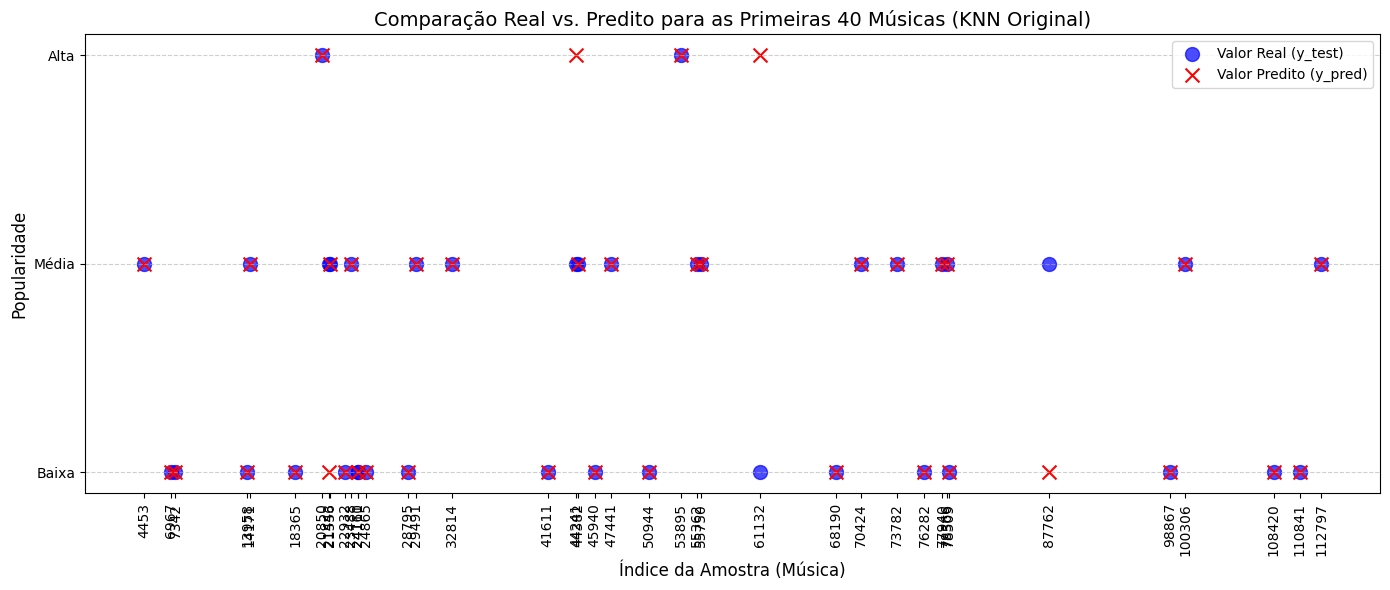

In [141]:
import matplotlib.pyplot as plt
import pandas as pd

# ----------------------------------------------------------------------
# Seleção dos Dados
# ----------------------------------------------------------------------
# Seleciona as primeiras 20 amostras do conjunto de teste
N_AMOSTRAS = 40

# Certifica-se de que os arrays são Series ou DataFrames para fácil slicing e visualização
y_test_series = pd.Series(y_test, name='Real').head(N_AMOSTRAS)
y_pred_series = pd.Series(y_pred_knn, name='Predito').head(N_AMOSTRAS)
indices = y_test_series.index.to_list()


# ----------------------------------------------------------------------
# Mapeamento para Valores Numéricos (para Plotagem)
# ----------------------------------------------------------------------
# O Matplotlib só plota números, então precisamos mapear as categorias para números.
# Usaremos o mapeamento implícito que o pandas Category/Ordinal já deve ter:
# 'baixa' (0), 'media' (1), 'alta' (2)

mapeamento_numerico = {'baixa': 0, 'media': 1, 'alta': 2}
y_test_num = y_test_series.map(mapeamento_numerico)
y_pred_num = y_pred_series.map(mapeamento_numerico)


# ----------------------------------------------------------------------
# Geração do Gráfico
# ----------------------------------------------------------------------
plt.figure(figsize=(14, 6))

# Plotar os valores Reais (pontos)
plt.scatter(indices, y_test_num, color='blue', marker='o', label='Valor Real (y_test)', s=100, alpha=0.7)

# Plotar os valores Preditos (x)
plt.scatter(indices, y_pred_num, color='red', marker='x', label='Valor Predito (y_pred)', s=100)

# Configuração dos Eixos e Títulos
plt.yticks([0, 1, 2], ['Baixa', 'Média', 'Alta'])
plt.xticks(indices)
plt.xlabel("Índice da Amostra (Música)", fontsize=12)
plt.xticks(indices, rotation=90)
plt.ylabel("Popularidade", fontsize=12)
plt.title(f"Comparação Real vs. Predito para as Primeiras {N_AMOSTRAS} Músicas (KNN Original)", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

### Comparativo de resultado dos modelos de classificação

In [143]:
import pandas as pd
from sklearn.metrics import classification_report
from IPython.display import display, Markdown

# ----------------------------------------------------------------------
# MÉTRICAS DE CLASSIFICAÇÃO (Popularidade: 'baixa', 'media', 'alta')
# ----------------------------------------------------------------------

# Função auxiliar para coletar métricas do Classification Report
def get_classification_metrics(y_true, y_pred, model_name):
    """Calcula e retorna as métricas-chave do classification_report."""
    try:
        report = classification_report(y_true, y_pred, output_dict=True)
        return {
            'Modelo': model_name,
            'Acurácia': report['accuracy'],
            'F1-Score (Ponderado)': report['weighted avg']['f1-score'],
            'Precisão (Ponderada)': report['weighted avg']['precision'],
            'Recall (Ponderado)': report['weighted avg']['recall']
        }
    except NameError:
        # Retorna N/A se o modelo de predição (y_pred_x) ainda não foi executado
        return {
            'Modelo': model_name,
            'Acurácia': 'N/A',
            'F1-Score (Ponderado)': 'N/A',
            'Precisão (Ponderada)': 'N/A',
            'Recall (Ponderado)': 'N/A'
        }

# Coleta as métricas de cada modelo de classificação
metricas_classificacao = []
metricas_classificacao.append(get_classification_metrics(y_test, y_pred, 'Naive Bayes'))
metricas_classificacao.append(get_classification_metrics(y_test, y_pred_svm, 'SVM'))
metricas_classificacao.append(get_classification_metrics(y_test, y_pred_knn, 'KNN'))

df_classificacao = pd.DataFrame(metricas_classificacao)

In [145]:
# Comparação dos Modelos de CLASSIFICAÇÃO
print("Métrica: Predição da Popularidade em categorias ('baixa', 'media', 'alta').")
print("O objetivo é ter as métricas (Acurácia/F1/Precisão/Recall) mais próximas de 1.0.")

# Formata os valores para exibição
for col in df_classificacao.columns:
    if col != 'Modelo' and df_classificacao[col].dtype == 'float64':
        df_classificacao[col] = df_classificacao[col].apply(lambda x: f"{x:.4f}")

display(Markdown(df_classificacao.to_markdown(index=False)))

print("\n" + "="*70)
print("\n### Análise dos Resultados de Classificação\n")

# Determina o melhor F1-Score
if all(v != 'N/A' for v in df_classificacao['F1-Score (Ponderado)']):
    melhor_f1 = df_classificacao.loc[df_classificacao['F1-Score (Ponderado)'].astype(float).idxmax()]

    print(f"O melhor modelo de Classificação é o **{melhor_f1['Modelo']}**")
    print(f"com um F1-Score ponderado de **{melhor_f1['F1-Score (Ponderado)']}**.")
    print("O F1-Score é a melhor métrica para avaliar o desempenho geral em classes desbalanceadas.")
else:
    print("Execute os modelos SVM e/ou KNN para obter a comparação completa de classificação.")

Métrica: Predição da Popularidade em categorias ('baixa', 'media', 'alta').
O objetivo é ter as métricas (Acurácia/F1/Precisão/Recall) mais próximas de 1.0.


| Modelo      |   Acurácia |   F1-Score (Ponderado) |   Precisão (Ponderada) |   Recall (Ponderado) |
|:------------|-----------:|-----------------------:|-----------------------:|---------------------:|
| Naive Bayes |     0.5288 |                 0.5221 |                 0.7669 |               0.5288 |
| SVM         |     0.7253 |                 0.7148 |                 0.717  |               0.7253 |
| KNN         |     0.6968 |                 0.6962 |                 0.6957 |               0.6968 |



### Análise dos Resultados de Classificação

O melhor modelo de Classificação é o **SVM**
com um F1-Score ponderado de **0.7148**.
O F1-Score é a melhor métrica para avaliar o desempenho geral em classes desbalanceadas.


### KNN usando RandomizedSearchCV e Cross-Validation para otimização do modelo
Combinando a lógica do RandomizedSearchCV (para buscar os melhores parâmetros rapidamente) e Cross-Validation (para validação robusta).

In [57]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np

In [52]:
# Define o pipeline KNN Otimizado, reaproveitando a estrutura de pré-processamento existente
pipeline_knn = Pipeline([
    ('preprocess', preprocess),
    ('model', KNeighborsClassifier(n_jobs=-1)) # Usamos n_jobs=-1 para otimizar
])

In [58]:
# ----------------------------------------------------------------------
# DEFINIÇÃO DO ESPAÇO DE PARÂMETROS PARA BUSCA
# ----------------------------------------------------------------------
param_grid_knn = {
    # 'n_neighbors': Quantos vizinhos considerar (a chave deve começar com 'model__')
    'model__n_neighbors': np.arange(1, 31, 2), # Busca em números ímpares de 1 a 30
    # 'weights': Como os vizinhos influenciam ('uniform' ou 'distance')
    'model__weights': ['uniform', 'distance'],
    # 'p': Parâmetro de distância (1 = Manhattan, 2 = Euclidiana)
    'model__p': [1, 2]
}

# ----------------------------------------------------------------------
# CONFIGURAÇÃO DO CROSS-VALIDATION
# ----------------------------------------------------------------------
# O uso de StratifiedKFold garante que as classes 'baixa', 'media', 'alta'
# sejam balanceadas em cada fold (K=5)
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [59]:
# ----------------------------------------------------------------------
# INSTANCIAÇÃO DO RANDOMIZEDSEARCHCV
# ----------------------------------------------------------------------
# n_iter=5: Número de combinações de parâmetros a serem testadas.
# scoring: Métrica a ser otimizada (F1-Score ponderado é ideal para classes desbalanceadas).
# refit: O melhor modelo encontrado será retreinado no conjunto de dados completo.
# verbose: Nível de detalhe do log.
# n_jobs=-1: Paraleliza o processo em todos os núcleos disponíveis.

random_search_knn = RandomizedSearchCV(
    estimator=pipeline_knn,
    param_distributions=param_grid_knn,
    n_iter=2, # <<= Com 2 combinações já demora muito
    cv=cv_strategy,
    scoring='f1_weighted', # Otimiza o F1-Score ponderado
    random_state=42,
    n_jobs=-1,
    verbose=2,
    refit=True
)

# ----------------------------------------------------------------------
# TREINAMENTO
# ----------------------------------------------------------------------
# Otimização e Treinamento do Modelo
print("Iniciando Randomized Search para KNN...")
random_search_knn.fit(X_train, y_train)

# O melhor modelo encontrado está acessível via .best_estimator_
best_knn_model = random_search_knn.best_estimator_

Iniciando Randomized Search para KNN...
Fitting 5 folds for each of 2 candidates, totalling 10 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [       nan 0.72830816]
  warnings.warn(


#### Avaliação Final do Modelo Otimizado


🏆 Melhores Parâmetros Encontrados:
{'model__weights': 'distance', 'model__p': 1, 'model__n_neighbors': np.int64(3)}
Melhor F1-Score (média do Cross-Validation): 0.7283

Relatório de Classificação - KNN Otimizado
              precision    recall  f1-score   support

        alta       0.61      0.58      0.60      2714
       baixa       0.76      0.74      0.75      7147
       media       0.77      0.79      0.78      9735

    accuracy                           0.74     19596
   macro avg       0.71      0.71      0.71     19596
weighted avg       0.74      0.74      0.74     19596



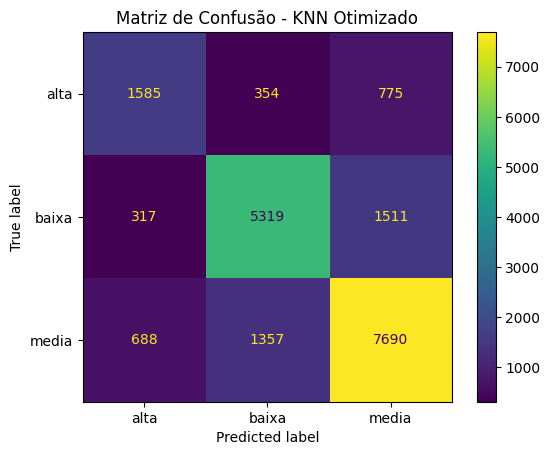

In [60]:
# ----------------------------------------------------------------------
# RESULTADOS E AVALIAÇÃO
# ----------------------------------------------------------------------
print("\n" + "="*50)
print("🏆 Melhores Parâmetros Encontrados:")
print(random_search_knn.best_params_)
print(f"Melhor F1-Score (média do Cross-Validation): {random_search_knn.best_score_:.4f}")
print("="*50)

# Predição com o modelo otimizado
y_pred_opt = best_knn_model.predict(X_test)

# Relatório de Classificação Final
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print("\nRelatório de Classificação - KNN Otimizado")
print(classification_report(y_test, y_pred_opt))

# Visualização da Matriz de Confusão
ConfusionMatrixDisplay.from_estimator(best_knn_model, X_test, y_test)
plt.title("Matriz de Confusão - KNN Otimizado")
plt.show()

#### Salvando o modelo KNN Otimizado

In [66]:
import joblib
import os

# Define o nome do arquivo para salvar o modelo
# Usamos o F1-Score no nome para fácil identificação da performance
F1_SCORE = random_search_knn.best_score_ # Recupera o melhor score de CV
FILENAME = f'best_knn_model_f1_{F1_SCORE:.4f}.joblib'

# 1. Salvar o modelo (Pipeline completo)
print(f"Salvando o modelo em: {FILENAME}")
joblib.dump(best_knn_model, FILENAME)

print("\n--- Verificação ---")
print(f"Modelo salvo com sucesso. Tamanho do arquivo: {os.path.getsize(FILENAME) / (1024*1024):.2f} MB")

Salvando o modelo em: best_knn_model_f1_0.7283.joblib

--- Verificação ---
Modelo salvo com sucesso. Tamanho do arquivo: 76.55 MB


#### Recuperando o modelo KNN Otimizado

In [67]:
import joblib
import pandas as pd
# Importações necessárias para garantir que o pipeline funcione (mesmo que as classes não sejam usadas diretamente)
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Definae o nome do arquivo que você salvou
# Substitua pelo nome exato que foi gerado acima, se necessário
LOAD_FILENAME = 'best_knn_model_f1_0.7283.joblib' # Ex: 'best_knn_model_f1_0.7580.joblib'

# Carregar o modelo
print(f"Carregando o modelo do arquivo: {LOAD_FILENAME}")
loaded_pipeline = joblib.load(LOAD_FILENAME)
print("Modelo carregado com sucesso!")

# Exemplo de uso para nova predição (com novos dados)
# Definição dos valores para 3 músicas aleatórias
# Estas são as 12 colunas que o seu modelo espera, após a limpeza inicial:

# Música 1: Baixa Popularidade (Ex: Acústica/Ambiente)
musica_1 = {
    'duration_ms': 180000,
    'danceability': 0.35,
    'energy': 0.2,
    'loudness': -15.0,
    'speechiness': 0.05,
    'acousticness': 0.95,
    'instrumentalness': 0.8,
    'liveness': 0.1,
    'valence': 0.15,
    'tempo': 90.0,
    'time_signature': 4,
    'mode' : 0,
    'key' : 3,
    'track_genre': 'ambient'
}

# Música 2: Média Popularidade (Ex: Pop Genérico)
musica_2 = {
    'duration_ms': 210000,
    'danceability': 0.65,
    'energy': 0.7,
    'loudness': -6.0,
    'speechiness': 0.10,
    'acousticness': 0.30,
    'instrumentalness': 0.0,
    'liveness': 0.2,
    'valence': 0.55,
    'tempo': 120.0,
    'time_signature': 4,
    'mode' : 1,
    'key' : 3,
    'track_genre': 'pop'
}

# Música 3: Alta Popularidade (Ex: Dance/Club)
musica_3 = {
    'duration_ms': 240000,
    'danceability': 0.80,
    'energy': 0.95,
    'loudness': -3.0,
    'speechiness': 0.04,
    'acousticness': 0.01,
    'instrumentalness': 0.0,
    'liveness': 0.35,
    'valence': 0.90,
    'tempo': 128.0,
    'time_signature': 4,
    'mode' : 0,
    'key' : 3,
    'track_genre': 'dance'
}

# CRIAÇÃO DO DATAFRAME DE NOVOS DADOS
# A ordem das colunas no DataFrame deve ser idêntica à ordem do treinamento!
colunas_modelo = [
    'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness', 'valence',
    'tempo', 'time_signature', 'mode','key','track_genre'
]

X_new = pd.DataFrame([musica_1, musica_2, musica_3], columns=colunas_modelo)

# ----------------------------------------------------------------------
# CARREGAMENTO E PREDIÇÃO
# ----------------------------------------------------------------------

try:
    # Carregar o pipeline completo (pré-processamento + modelo)
    loaded_pipeline = joblib.load(LOAD_FILENAME)
    print(f"Modelo {LOAD_FILENAME} carregado com sucesso.")

    # Executar a predição
    new_predictions = loaded_pipeline.predict(X_new)

    print("\n" + "="*50)
    print("Previsão de Popularidade (Categorizada):")

    # Exibir resultados detalhados
    X_new['Previsao_Popularidade'] = new_predictions
    X_new['Musica'] = ['Musica 1', 'Musica 2', 'Musica 3']

    print(X_new[['Musica', 'track_genre', 'Previsao_Popularidade', 'danceability', 'energy', 'loudness']].to_markdown(index=False))
    print("="*50)

except FileNotFoundError:
    print(f"\n ERRO: O arquivo do modelo '{LOAD_FILENAME}' não foi encontrado.")
    print("Certifique-se de que o nome do arquivo na variável LOAD_FILENAME está correto.")
except Exception as e:
    print(f"\nOcorreu um erro ao carregar ou predizer: {e}")

Carregando o modelo do arquivo: best_knn_model_f1_0.7283.joblib
Modelo carregado com sucesso!
Modelo best_knn_model_f1_0.7283.joblib carregado com sucesso.

Previsão de Popularidade (Categorizada):
| Musica   | track_genre   | Previsao_Popularidade   |   danceability |   energy |   loudness |
|:---------|:--------------|:------------------------|---------------:|---------:|-----------:|
| Musica 1 | ambient       | media                   |           0.35 |     0.2  |        -15 |
| Musica 2 | pop           | alta                    |           0.65 |     0.7  |         -6 |
| Musica 3 | dance         | baixa                   |           0.8  |     0.95 |         -3 |
